Downloading...
From: https://drive.google.com/uc?id=13yYiAdON8qW3L_5LMa0QcWWgKwax7xJ3
To: /content/IMG_1473.jpg
3.27MB [00:00, 101MB/s]
4032 3024


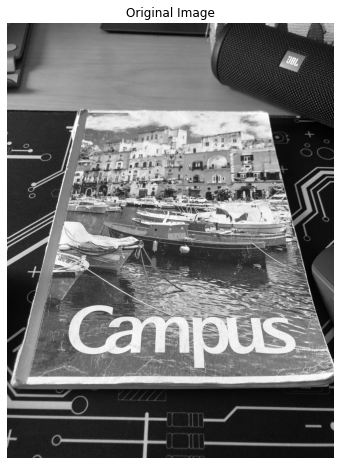

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import NoNorm

!gdown --id 13yYiAdON8qW3L_5LMa0QcWWgKwax7xJ3

filename = './IMG_1473.jpg'
image = cv2.imread(filename, 0)
height, width = image.shape[0], image.shape[1]
print(height, width)
# Show image
plt.figure(figsize=(12, 8))
plt.imshow(image, cmap='gray',norm=NoNorm())
plt.title('Original Image')
plt.axis('off')
plt.show()

In [19]:
def scale_to_0_255(img):
    min_val = np.min(img)
    max_val = np.max(img)
    new_img = (img - min_val) / (max_val - min_val) # 0-1
    new_img *= 255
    return new_img

def my_canny(img, min_val, max_val, sobel_size=3, is_L2_gradient=False):
    #2. Noise Reduction
    smooth_img = cv2.GaussianBlur(img, ksize=(5, 5), sigmaX=1, sigmaY=1)
    
    #3. Finding Intensity Gradient of the Image
    Gx = cv2.Sobel(smooth_img, cv2.CV_64F, 1, 0, ksize=sobel_size)
    Gy = cv2.Sobel(smooth_img, cv2.CV_64F, 0, 1, ksize=sobel_size)
        
    if is_L2_gradient:
        edge_gradient = np.sqrt(Gx*Gx + Gy*Gy)
    else:
        edge_gradient = np.abs(Gx) + np.abs(Gy)
    
    angle = np.arctan2(Gy, Gx) * 180 / np.pi
    
    # round angle to 4 directions
    angle = np.abs(angle)
    angle[angle <= 22.5] = 0
    angle[angle >= 157.5] = 0
    angle[(angle > 22.5) * (angle < 67.5)] = 45
    angle[(angle >= 67.5) * (angle <= 112.5)] = 90
    angle[(angle > 112.5) * (angle <= 157.5)] = 135
    
    #4. Non-maximum Suppression
    keep_mask = np.zeros(smooth_img.shape, np.uint8)
    for y in range(1, edge_gradient.shape[0]-1):
        for x in range(1, edge_gradient.shape[1]-1):
            area_grad_intensity = edge_gradient[y-1:y+2, x-1:x+2] # 3x3 area
            area_angle = angle[y-1:y+2, x-1:x+2] # 3x3 area
            current_angle = area_angle[1,1]
            current_grad_intensity = area_grad_intensity[1,1]
            
            if current_angle == 0:
                if current_grad_intensity > max(area_grad_intensity[1,0], area_grad_intensity[1,2]):
                    keep_mask[y,x] = 255
                else:
                    edge_gradient[y,x] = 0
            elif current_angle == 45:
                if current_grad_intensity > max(area_grad_intensity[2,0], area_grad_intensity[0,2]):
                    keep_mask[y,x] = 255
                else:
                    edge_gradient[y,x] = 0
            elif current_angle == 90:
                if current_grad_intensity > max(area_grad_intensity[0,1], area_grad_intensity[2,1]):
                    keep_mask[y,x] = 255
                else:
                    edge_gradient[y,x] = 0
            elif current_angle == 135:
                if current_grad_intensity > max(area_grad_intensity[0,0], area_grad_intensity[2,2]):
                    keep_mask[y,x] = 255
                else:
                    edge_gradient[y,x] = 0
    
    #5. Hysteresis Thresholding    
    canny_mask = np.zeros(smooth_img.shape, np.uint8)
    canny_mask[(keep_mask>0) * (edge_gradient>min_val)] = 255
    
    return scale_to_0_255(canny_mask)



In [1]:
my_canny = my_canny(image, min_val=100, max_val=200)
edges = cv2.Canny(image, 50, 200, apertureSize=3)

# Show image
plt.figure(figsize=(12, 8))
plt.imshow(my_canny, cmap='gray',norm=NoNorm())
plt.title('My Canny')
plt.axis('off')
plt.show()

# Show image
plt.figure(figsize=(12, 8))
plt.imshow(edges, cmap='gray',norm=NoNorm())
plt.title('OpenCV Canny')
plt.axis('off')
plt.show()


NameError: ignored